# Crop Recommendation Data Analysis

## Importing necessary libraries

In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

## Dataset Loading

In [2]:
crop = pd.read_csv('Dataset\Crop_recommendation.csv')

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\voutl\AppData\Local\Temp\ipykernel_17684\37066146.py:1: SyntaxWarning: invalid escape sequence '\C'
  crop = pd.read_csv('Dataset\Crop_recommendation.csv')


In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Dataset Structure Information

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.shape

(2200, 8)

In [6]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crops = len(crop['label'].unique())
print("Number of various crops", crops)
crop['label'].unique()

Number of various crops 22


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### Crop Distribution Visualization

C:\Users\voutl\AppData\Local\Temp\ipykernel_17684\1289265281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(crop['label'], palette='viridis')


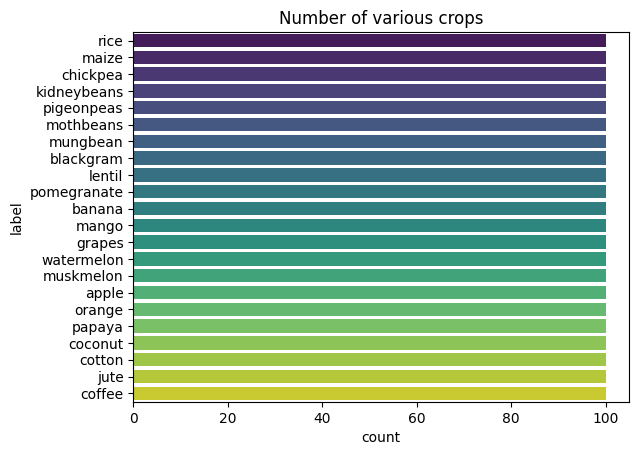

In [9]:
plt.Figure(figsize=(20, 10))
sns.countplot(crop['label'], palette='viridis')
plt.title('Number of various crops')
plt.xticks(rotation=0)
plt.show()

In [10]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [88]:
crop_summary = pd.pivot_table(crop, index='label', values=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], aggfunc='mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


## Data Visualization and Analysis

### Nitrogen Analysis

In [14]:
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}
last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}
fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colors),
           orientation='h',
          text=top['x']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colors),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Phosphorus Analysis

In [22]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
    'y' : crop_summary_P['P'][0:10].sort_values().index,
    'x' : crop_summary_P['P'][0:10].sort_values()
}
last = {
    'y' : crop_summary_P['P'][-10:].index,
    'x' : crop_summary_P['P'][-10:]
}
fig.add_trace(
    go.Bar(top,
           name="Most Phosphorous required",
           marker_color=random.choice(colors),
           orientation='h',
          text=top['x']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least Phosphorous required",
           marker_color=random.choice(colors),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorous (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Potassium Analysis

In [38]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
fig = make_subplots(rows=1, cols=2)
top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}
last = {
    'y' : crop_summary_K['K'][-10:].index,
    'x' : crop_summary_K['K'][-10:]
}
fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colors),
           orientation='h',
          text=top['x']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colors),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### N P K values comparision between different crops

In [43]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color=random.choice(colors)
))

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color=random.choice(colors)
))

fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potassium',
    marker_color=random.choice(colors)
))

fig.update_layout(
    title="Nitrogen, Phosphorous, Potassium Values Comparison Between Crops",
    title_font=dict(size=18),
    plot_bgcolor='white',
    barmode='group',
    xaxis_tickangle=-45,
    width=1200,  # Increased width
    height=600   # Increased height
)

fig.show()

### N P K ratio for rice, cotton, jute, maize and lentis

In [53]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

labels = ['Nitrogen (N)', 'Phosphorous (P)', 'Potassium (K)']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Custom colors for consistency

# Create a subplot layout: 3 rows and 2 columns
fig = make_subplots(
    rows=3, cols=2,
    specs=[
        [{'type': 'domain'}, {'type': 'domain'}],  # Row 1
        [{'type': 'domain'}, {'type': 'domain'}],  # Row 2
        [{'type': 'domain', 'colspan': 2}, None]   # Row 3 (full width)
    ],
    subplot_titles=["Rice", "Cotton", "Jute", "Maize", "Lentil"],
    vertical_spacing=0.1,  # Reduced spacing to increase chart size
    horizontal_spacing=0.05  # Reduced space between columns
)

# List of crops and their positions in the grid
crops = [("rice", 1, 1), ("cotton", 1, 2), ("jute", 2, 1), 
         ("maize", 2, 2), ("lentil", 3, 1)]  # Lentil spans both columns

# Adding Pie Charts with larger domains
for crop, row, col in crops:
    npk_values = crop_summary.loc[crop, ['N', 'P', 'K']]
    fig.add_trace(
        go.Pie(
            labels=labels,
            values=npk_values,
            name=crop.capitalize(),
            marker=dict(colors=colors),
            hole=0.2  # Smaller hole for fuller pies
        ),
        row=row, col=col
    )

# Update layout for better visualization
fig.update_layout(
    title_text="Nitrogen, Phosphorous, Potassium Ratio for Various Crops",
    title_font=dict(size=18),
    height=1000,  # Increased height
    width=1200,   # Increased width
    showlegend=False  # Remove legend to maximize space
)

fig.show()


### N P K ratio for fruits

In [56]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

labels = ['Nitrogen (N)', 'Phosphorous (P)', 'Potassium (K)']

# Create a 4-row, 3-column layout for bigger charts
fig = make_subplots(
    rows=4, cols=3,  
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}],
           [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}],
           [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}],
           [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]],
    subplot_titles=["Apple", "Banana", "Grapes", 
                    "Orange", "Mango", "Coconut", 
                    "Papaya", "Pomegranate", "Watermelon", 
                    "Muskmelon"],  
    vertical_spacing=0.1,  # Reduce vertical space for bigger pies
    horizontal_spacing=0.02  # Reduce horizontal space for bigger pies
)

# List of fruits for iteration
fruits = ["apple", "banana", "grapes", "orange", "mango", 
          "coconut", "papaya", "pomegranate", "watermelon", "muskmelon"]

# Adding Pie Charts with larger domain
row, col = 1, 1  # Start from first row and column
for fruit in fruits:
    npk_values = crop_summary.loc[fruit, ['N', 'P', 'K']]
    fig.add_trace(
        go.Pie(
            labels=labels, 
            values=npk_values, 
            name=fruit.capitalize(), 
            marker_colors=colors,
            hole=0.2,  # Smaller hole for a fuller pie
        ),
        row=row, col=col
    )
    col += 1  # Move to next column
    if col > 3:  # If 3 columns are filled, move to next row
        col = 1
        row += 1

# Update Layout for Bigger Pie Charts
fig.update_layout(
    title_text="Nitrogen, Phosphorous, Potassium Ratio for Fruits",
    title_font=dict(size=18),
    height=1000,  # Increased height for larger pies
    width=1200,   # Increased width for more spacing
    showlegend=False  # Remove legend to maximize space
)

fig.show()


In [ ]:
# Ensure the 'label' column exists and contains valid crop names
valid_crops = ['rice', 'jute', 'cotton', 'maize', 'lentil']
crop_scatter = crop[crop['label'].isin(valid_crops)]  # More efficient filtering

# Create scatter plot
fig = px.scatter(
    crop_scatter, 
    x="temperature", 
    y="humidity", 
    color="label", 
    symbol="label",
    title="Temperature vs Humidity for Selected Crops"
)

# Update layout for better visualization
fig.update_layout(
    plot_bgcolor='white', 
    xaxis=dict(showgrid=False), 
    yaxis=dict(showgrid=False)
)

fig.show()


### Comparision between Temperature, Humidity and Ranifall

In [94]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["temperature", "humidity", "rainfall"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                  xaxis_tickangle=-90,
                  width=1200,
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Correlation between different features

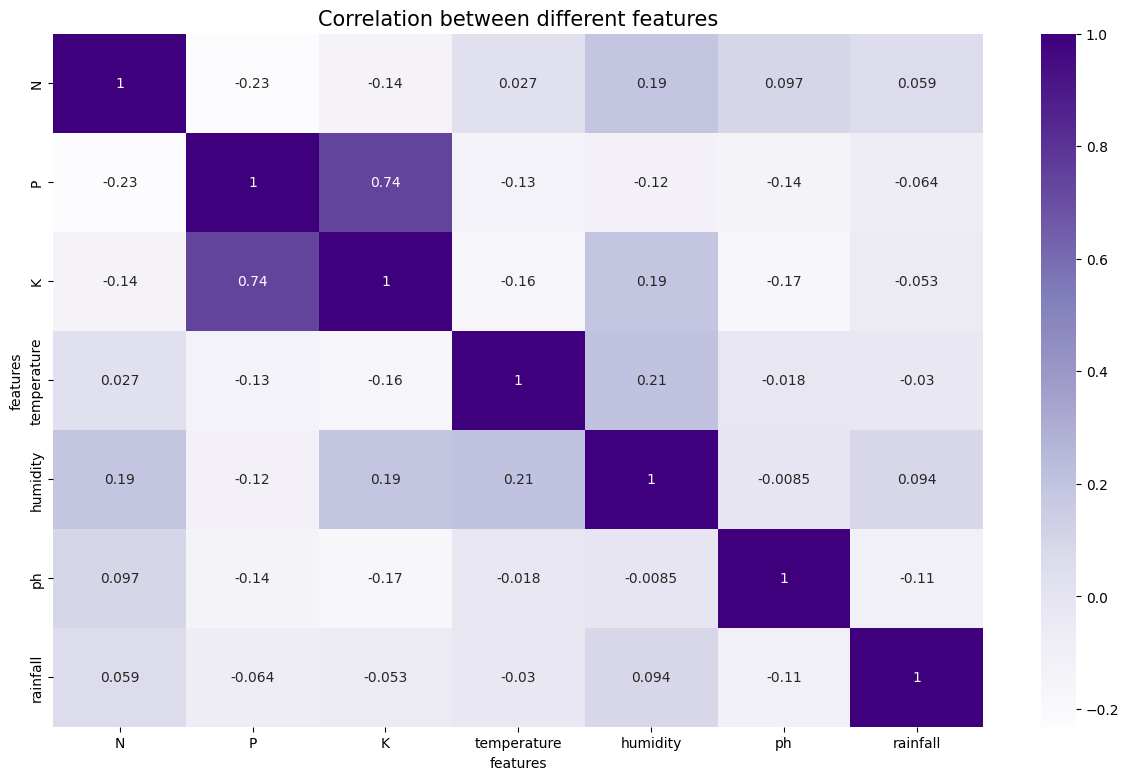

In [95]:
# Select only numeric columns
numeric_data = crop.select_dtypes(include=['number'])

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(numeric_data.corr(), annot=True,cmap='Purples')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()